In [1]:
# 실습에 필요한 라이브러리를 불러옵니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# 사이킷런에서 보스턴 주택 가격 데이터세트를 불러옵니다.
dataset = datasets.load_boston()

# 입력 데이터와 타깃을 준비합니다.
X, y = dataset['data'], dataset['target']

# 데이터세트를 학습 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [3]:
# 데이터 범위 조정을 위해 표준화를 적용합니다.
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [4]:
# 선형 회귀 모델 객체를 만듭니다.
model = LinearRegression()

# 선형 회귀 모델에 학습 세트의 입력 데이터와 타깃을 넣고 학습시킵니다.
model.fit(X_train_std, y_train)

LinearRegression()

In [5]:
# 학습 세트에서의 R^2 점수와 테스트 세트에서의 R^2 점수를 계산합니다.
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

# 학습 세트에서의 R^2 점수와 테스트 세트에서의 R^2 점수를 출력합니다.
print('학습 세트 R^2 점수: {score:.3f}'.format(score=train_score))
print('테스트 세트 R^2 점수: {score:.3f}'.format(score=test_score))

학습 세트 R^2 점수: 0.717
테스트 세트 R^2 점수: 0.779


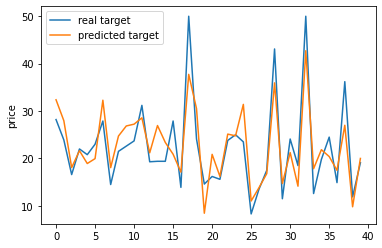

In [6]:
# 학습된 모델에 테스트 세트의 입력 데이터를 다시 넣고 타깃을 추론합니다.
y_predicted = model.predict(X_test_std)

# 실제값과 추론값 사이의 관계를 꺾은선 그래프로 그립니다.
number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

In [7]:
# 학습된 계수(기울기)를 확인합니다.
print('계수: {coefficient}'.format(coefficient=model.coef_))

# 학습된 y 절편을 확인합니다.
print('y 절편: {y_intercept}'.format(y_intercept=model.intercept_))

계수: [-1.07145146  1.34036243  0.26298069  0.66554537 -2.49842551  1.97524314
  0.19516605 -3.14274974  2.66736136 -1.80685572 -2.13034748  0.56172933
 -4.03223518]
y 절편: 22.344591029023768
